# Testing loading afterpulse

This notebook will be for testing if afterpulse files can easily be loaded through the `load_mpl_inline` framework

In [6]:
import xarray as xr
import numpy as np
import os

import matplotlib.pyplot as plt

import load_mpl_inline
import raw_to_ingested

In [36]:
dir_afterpulse = '/gws/nopw/j04/ncas_radar_vol2/data/ICECAPSarchive/mpl/raw'
fname_afterpulse = '201804131246.mpl.gz'

fname = os.path.join(dir_afterpulse, fname_afterpulse)

In [37]:
ds = load_mpl_inline.load_mpl_inline(fname)

In [38]:
ds

<xarray.Dataset>
Dimensions:                      (profile: 160, range: 1999)
Dimensions without coordinates: profile, range
Data variables: (12/52)
    unit                         (profile) float32 108.0 108.0 ... 108.0 108.0
    version                      (profile) float32 413.0 413.0 ... 413.0 413.0
    shots_sum                    (profile) float64 1.25e+04 ... 1.25e+04
    trigger_frequency            (profile) float64 2.5e+03 2.5e+03 ... 2.5e+03
    energy_monitor               (profile) float64 4.954e+03 ... 4.885e+03
    temp_0                       (profile) float64 1.632e+03 ... 1.644e+03
    ...                           ...
    channel_2                    (profile, range) float32 0.0544 ... 0.0544
    time_utc                     (profile) object '2018-04-13T12:46:40' ... '...
    time                         (profile) datetime64[ns] 2018-04-13T12:46:40...
    c                            float64 2.998e+08
    nrb_copol                    (profile, range) float64 -1.012e-08 ... -0.2645
    nrb_crosspol                 (profile, range) float64 -7.916e-08 ... -0.0232
Attributes:
    created:   2023-02-16T:15:47:20Z
    software:  mpl2nc (https://github.com/peterkuma/mpl2nc)
    version:   1.3.5

In [39]:
ds_ing = raw_to_ingested.raw_to_ingested(None, None, data_loaded=ds)
ds_ing

<xarray.Dataset>
Dimensions:          (time: 160, height: 1200)
Coordinates:
  * time             (time) datetime64[ns] 2018-04-13T12:46:40 ... 2018-04-13...
  * height           (height) float64 -3e+03 -2.985e+03 ... 1.496e+04 1.497e+04
Data variables: (12/19)
    base_time        datetime64[ns] 2018-04-13T12:46:40
    time_offset      (time) timedelta64[ns] 00:00:00 00:00:05 ... 00:13:15
    hour             (time) float32 12.78 12.78 12.78 12.78 ... 13.0 13.0 13.0
    nshots           (time) int32 12500 12500 12500 12500 ... 12500 12500 12500
    rep_rate         (time) int32 2500 2500 2500 2500 ... 2500 2500 2500 2500
    energy           (time) float32 4.954 4.954 4.954 ... 4.885 4.886 4.885
    ...               ...
    initial_cbh      (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    backscatter_1    (time, height) float32 0.056 0.0448 ... 0.0624 0.0608
    backscatter_2    (time, height) float32 0.0544 0.0368 0.056 ... 0.04 0.0528
    lat              float32 72.6
    lon              float32 -38.42
    alt              float32 3.2e+03
Attributes:
    Date_created:              2023-02-16T15:47:20 UTC
    Ingest_version:            Id: mpl/raw_to_ingested.py ,v 0.1 2023/02/14 
    comment:                   DOE Atmospheric Radiation Measurement (ARM) Mi...
    Author:                    Dave Turner, NOAA National Severe Storms Labor...
    instrument_serial_number:  108
    instrument_version:        413
    backscatter_comment:       See Flynn et al. 2007 Optics Express paper for...

In [40]:
afterpulse_1 = ds_ing.backscatter_1.mean(dim='time')
afterpulse_2 = ds_ing.backscatter_2.mean(dim='time')

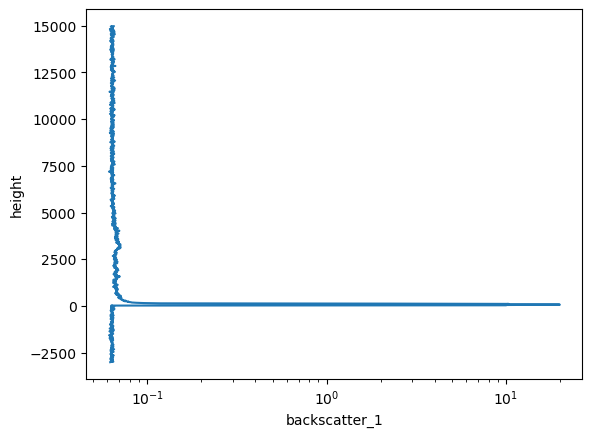

In [41]:
afterpulse_1.plot(y='height',xscale='log')

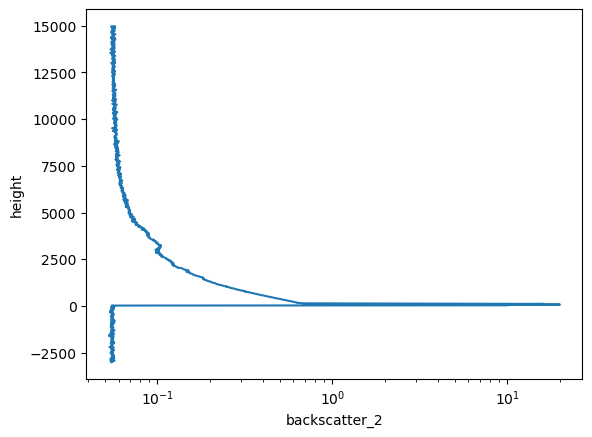

In [42]:
afterpulse_2.plot(y='height',xscale='log')

In [44]:
ds_new = xr.Dataset()
ds_new['afterpulse_1'] = afterpulse_1
ds_new['afterpulse_2'] = afterpulse_2

ds_new

<xarray.Dataset>
Dimensions:       (height: 1200)
Coordinates:
  * height        (height) float64 -3e+03 -2.985e+03 ... 1.496e+04 1.497e+04
Data variables:
    afterpulse_1  (height) float32 0.06214 0.06304 0.06475 ... 0.0626 0.06503
    afterpulse_2  (height) float32 0.05456 0.05442 0.05514 ... 0.05525 0.05688